In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller

In [2]:
data=pd.read_csv("AirPassengers.csv",index_col='Month',parse_dates=True)
data.index.freq='MS'

In [3]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

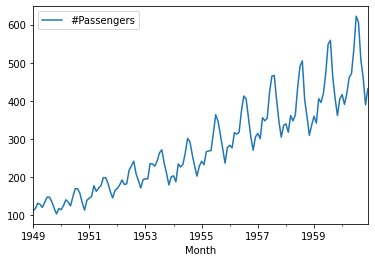

In [4]:
data.plot()

In [5]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [6]:
adfuller_test(data['#Passengers'])

ADF Test Statistic : 0.8153688792060569
p-value : 0.9918802434376411
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [7]:
data['Sales First Difference'] = data['#Passengers']-data['#Passengers'].shift(1)


In [8]:
data['#Passengers'].shift(1)


Month
1949-01-01      NaN
1949-02-01    112.0
1949-03-01    118.0
1949-04-01    132.0
1949-05-01    129.0
              ...  
1960-08-01    622.0
1960-09-01    606.0
1960-10-01    508.0
1960-11-01    461.0
1960-12-01    390.0
Freq: MS, Name: #Passengers, Length: 144, dtype: float64

In [9]:
data['Seasonal First Difference']=data['#Passengers']-data['#Passengers'].shift(12)

In [10]:
data.head()

,#Passengers,Sales First Difference,Seasonal First Difference
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


In [11]:
adfuller_test(data['#Passengers'])

ADF Test Statistic : 0.8153688792060569
p-value : 0.9918802434376411
#Lags Used : 13
Number of Observations Used : 130
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
adfuller_test(data['Seasonal First Difference'].dropna())

ADF Test Statistic : -3.383020726492481
p-value : 0.011551493085514952
#Lags Used : 1
Number of Observations Used : 130
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

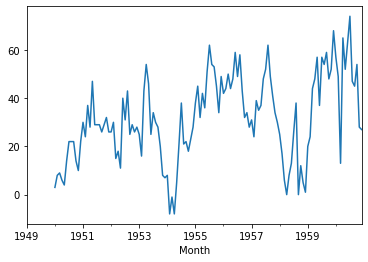

In [13]:
data['Seasonal First Difference'].plot()

In [14]:
stepwise_fit=auto_arima(data['#Passengers'].dropna(),start_p=0,start_q=0,max_p=2,max_q=2,seasonal=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.25 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

In [15]:
from statsmodels.tsa.arima_model import ARIMA

In [16]:
model=ARIMA(data['#Passengers'],order=(2,1,1))
model_fit=model.fit()

In [17]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -675.848
Method:                       css-mle   S.D. of innovations             26.881
Date:                Tue, 11 May 2021   AIC                           1361.696
Time:                        15:05:56   BIC                           1376.510
Sample:                    02-01-1949   HQIC                          1367.716
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6695      0.132     20.185      0.000       2.410       2.929
ar.L1.D.#Passengers     1.1043      0.071     15.460      0.000       0.964       1.244
ar.L2.D.#Passengers    -0.5104      0.072     -7.095      0.000      -0.651      -0.369
ma.L1.D.#Passengers    -0.9999      0.029    -34.129      0.000      -1.057      -0.943
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0818           -0.8883j            1.3998           -0.1094
AR.2            1.0818           +0.8883j            1.3998            0.1094
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

Text(0.5, 1.0, 'ARIMA Model Prediction')

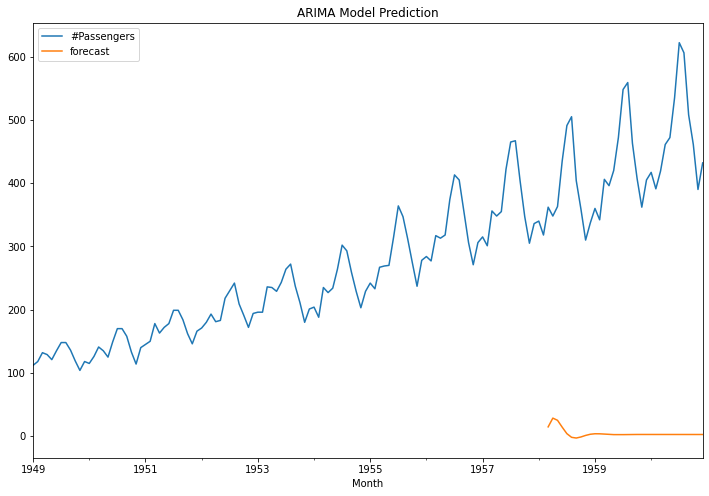

In [26]:
data['forecast']=model_fit.predict(start=110,end=143,dynamic=True)
data[['#Passengers','forecast']].plot(figsize=(12,8))
plt.title("ARIMA Model Prediction")

In [19]:
import statsmodels.api as sm

In [20]:
model=sm.tsa.statespace.SARIMAX(data['#Passengers'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

Text(0.5, 1.0, 'SARIMA Model Prediction')

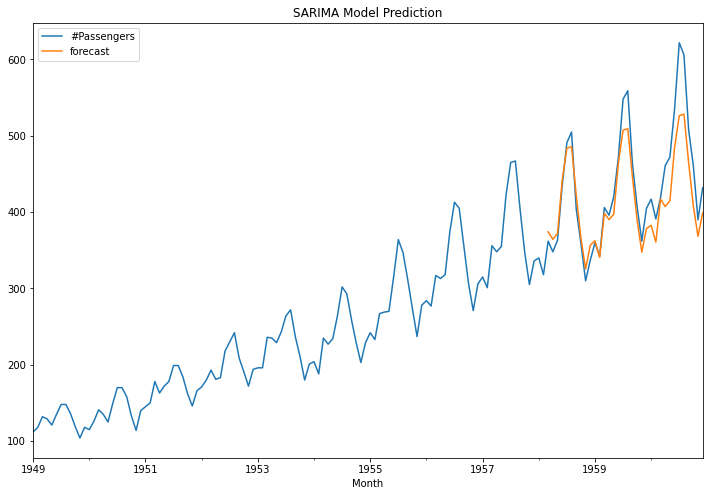

In [27]:
data['forecast']=results.predict(start=110,end=143,dynamic=True)
data[['#Passengers','forecast']].plot(figsize=(12,8))
plt.title("SARIMA Model Prediction")

In [22]:
from pandas.tseries.offsets import DateOffset
future_dates=[data.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [23]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=data.columns)

In [24]:
future_df=pd.concat([data,future_datest_df])

Text(0.5, 1.0, 'Future Forecast by SARIMA model')

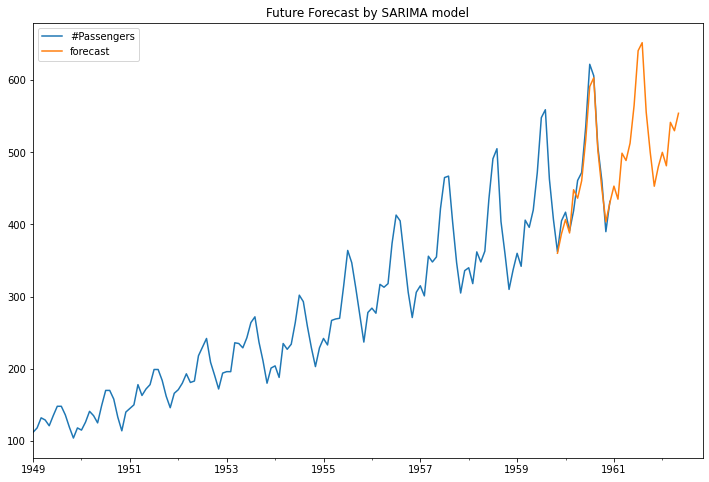

In [28]:
future_df['forecast'] = results.predict(start = 130, end = 160, dynamic= True)  
future_df[['#Passengers', 'forecast']].plot(figsize=(12, 8))
plt.title("Future Forecast by SARIMA model")